<a href="https://colab.research.google.com/github/ricky-kiva/ml-machine-beginner/blob/main/m2_l4_k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K Means Clustering**

**Dataset link:** https://storage.googleapis.com/kaggle-data-sets/42674/74935/bundle/archive.zip

In [8]:
# import libraries
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Extract dataset

In [2]:
# unzip files (uploaded zip file name should be 'archive.zip')
local_zip = './archive.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')

zip_ref.close()

Explore dataset

In [3]:
df = pd.read_csv('./data/Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


Data preprocessing

In [4]:
# change column name
df = df.rename(columns={
    'Gender': 'gender',
    'Age': 'age',
    'Annual Income (k$)': 'annual_income',
    'Spending Score (1-100)': 'spending_score'
})

# change categorical data to numeric (so computer easy to read)
df['gender'].replace(['Female', 'Male'], [0, 1], inplace=True)

df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Data Cleaning

In [5]:
X = df.drop(['CustomerID', 'gender'], axis=1)

Create list containing **Inertia**

In [7]:
from sklearn.cluster import KMeans

clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Visualize model

Text(0, 0.5, 'Inertia')

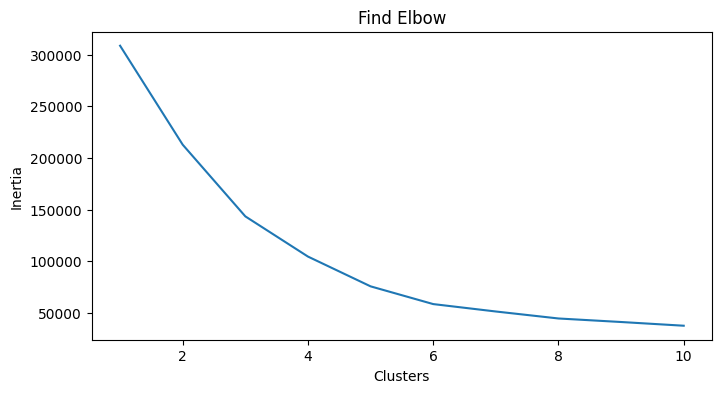

In [9]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Find Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

*   It shows that **Clusters = 5** is where the change of **Inertia** is not significant
*   It means in **Clusters = 5** the data is clustered well enough



Re-train the K-means using the K from *Elbow method*

In [11]:
# build KMeans model using K from Elbow method
km5 = KMeans(n_clusters=5).fit(X)

# add 'Labels' column in the dataset
X['Labels'] = km5.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualize the clusters

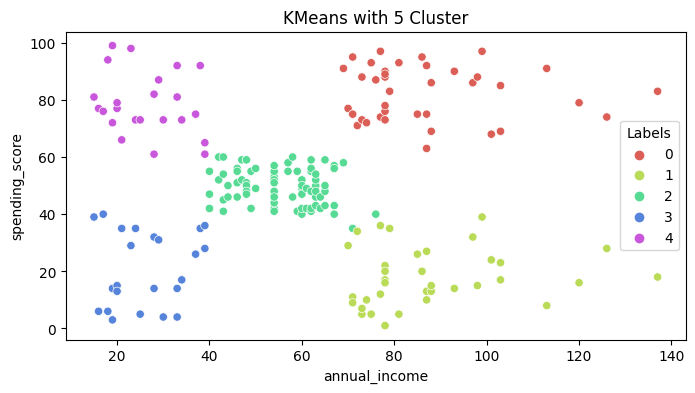

In [13]:
plt.figure(figsize=(8,4))
sns.scatterplot(
    x=X['annual_income'],
    y=X['spending_score'],
    hue=X['Labels'],
    palette=sns.color_palette('hls', 5)
    )

plt.title('KMeans with 5 Cluster')
plt.show()